## Checking System 

In [1]:
import torch
torch.__version__

'2.0.1+cu118'

In [2]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce GTX 1050'

In [3]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

# Test-1 

In [4]:
from super_gradients.training import models
device = 'cuda' if torch.cuda.is_available() else 'cpu'

[2023-10-10 20:21:52] INFO - utils.py - NumExpr defaulting to 8 threads.


In [5]:
model = models.get(
    model_name='yolo_nas_l',
    checkpoint_path='S:/Jupyter_Notebooks/Object Detection/checkpoints/ckpt_best.pth',
    num_classes=1
)

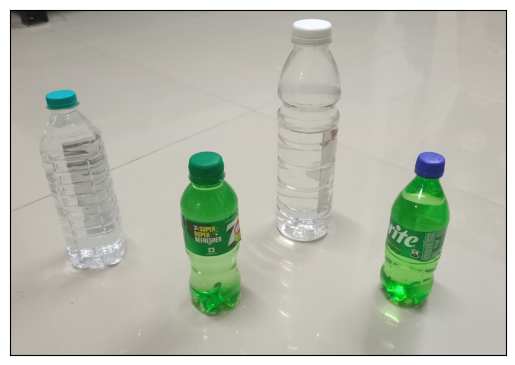

In [6]:
# Testing model on image

import cv2
import matplotlib.pyplot as plt

im =  cv2.imread("bottles.jpg")
img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

# Plotting the image
def plot_image(img, cmap=None):
    plt.imshow(img, cmap=cmap)
    plt.xticks([])
    plt.yticks([])
    
plot_image(img)
plt.show()

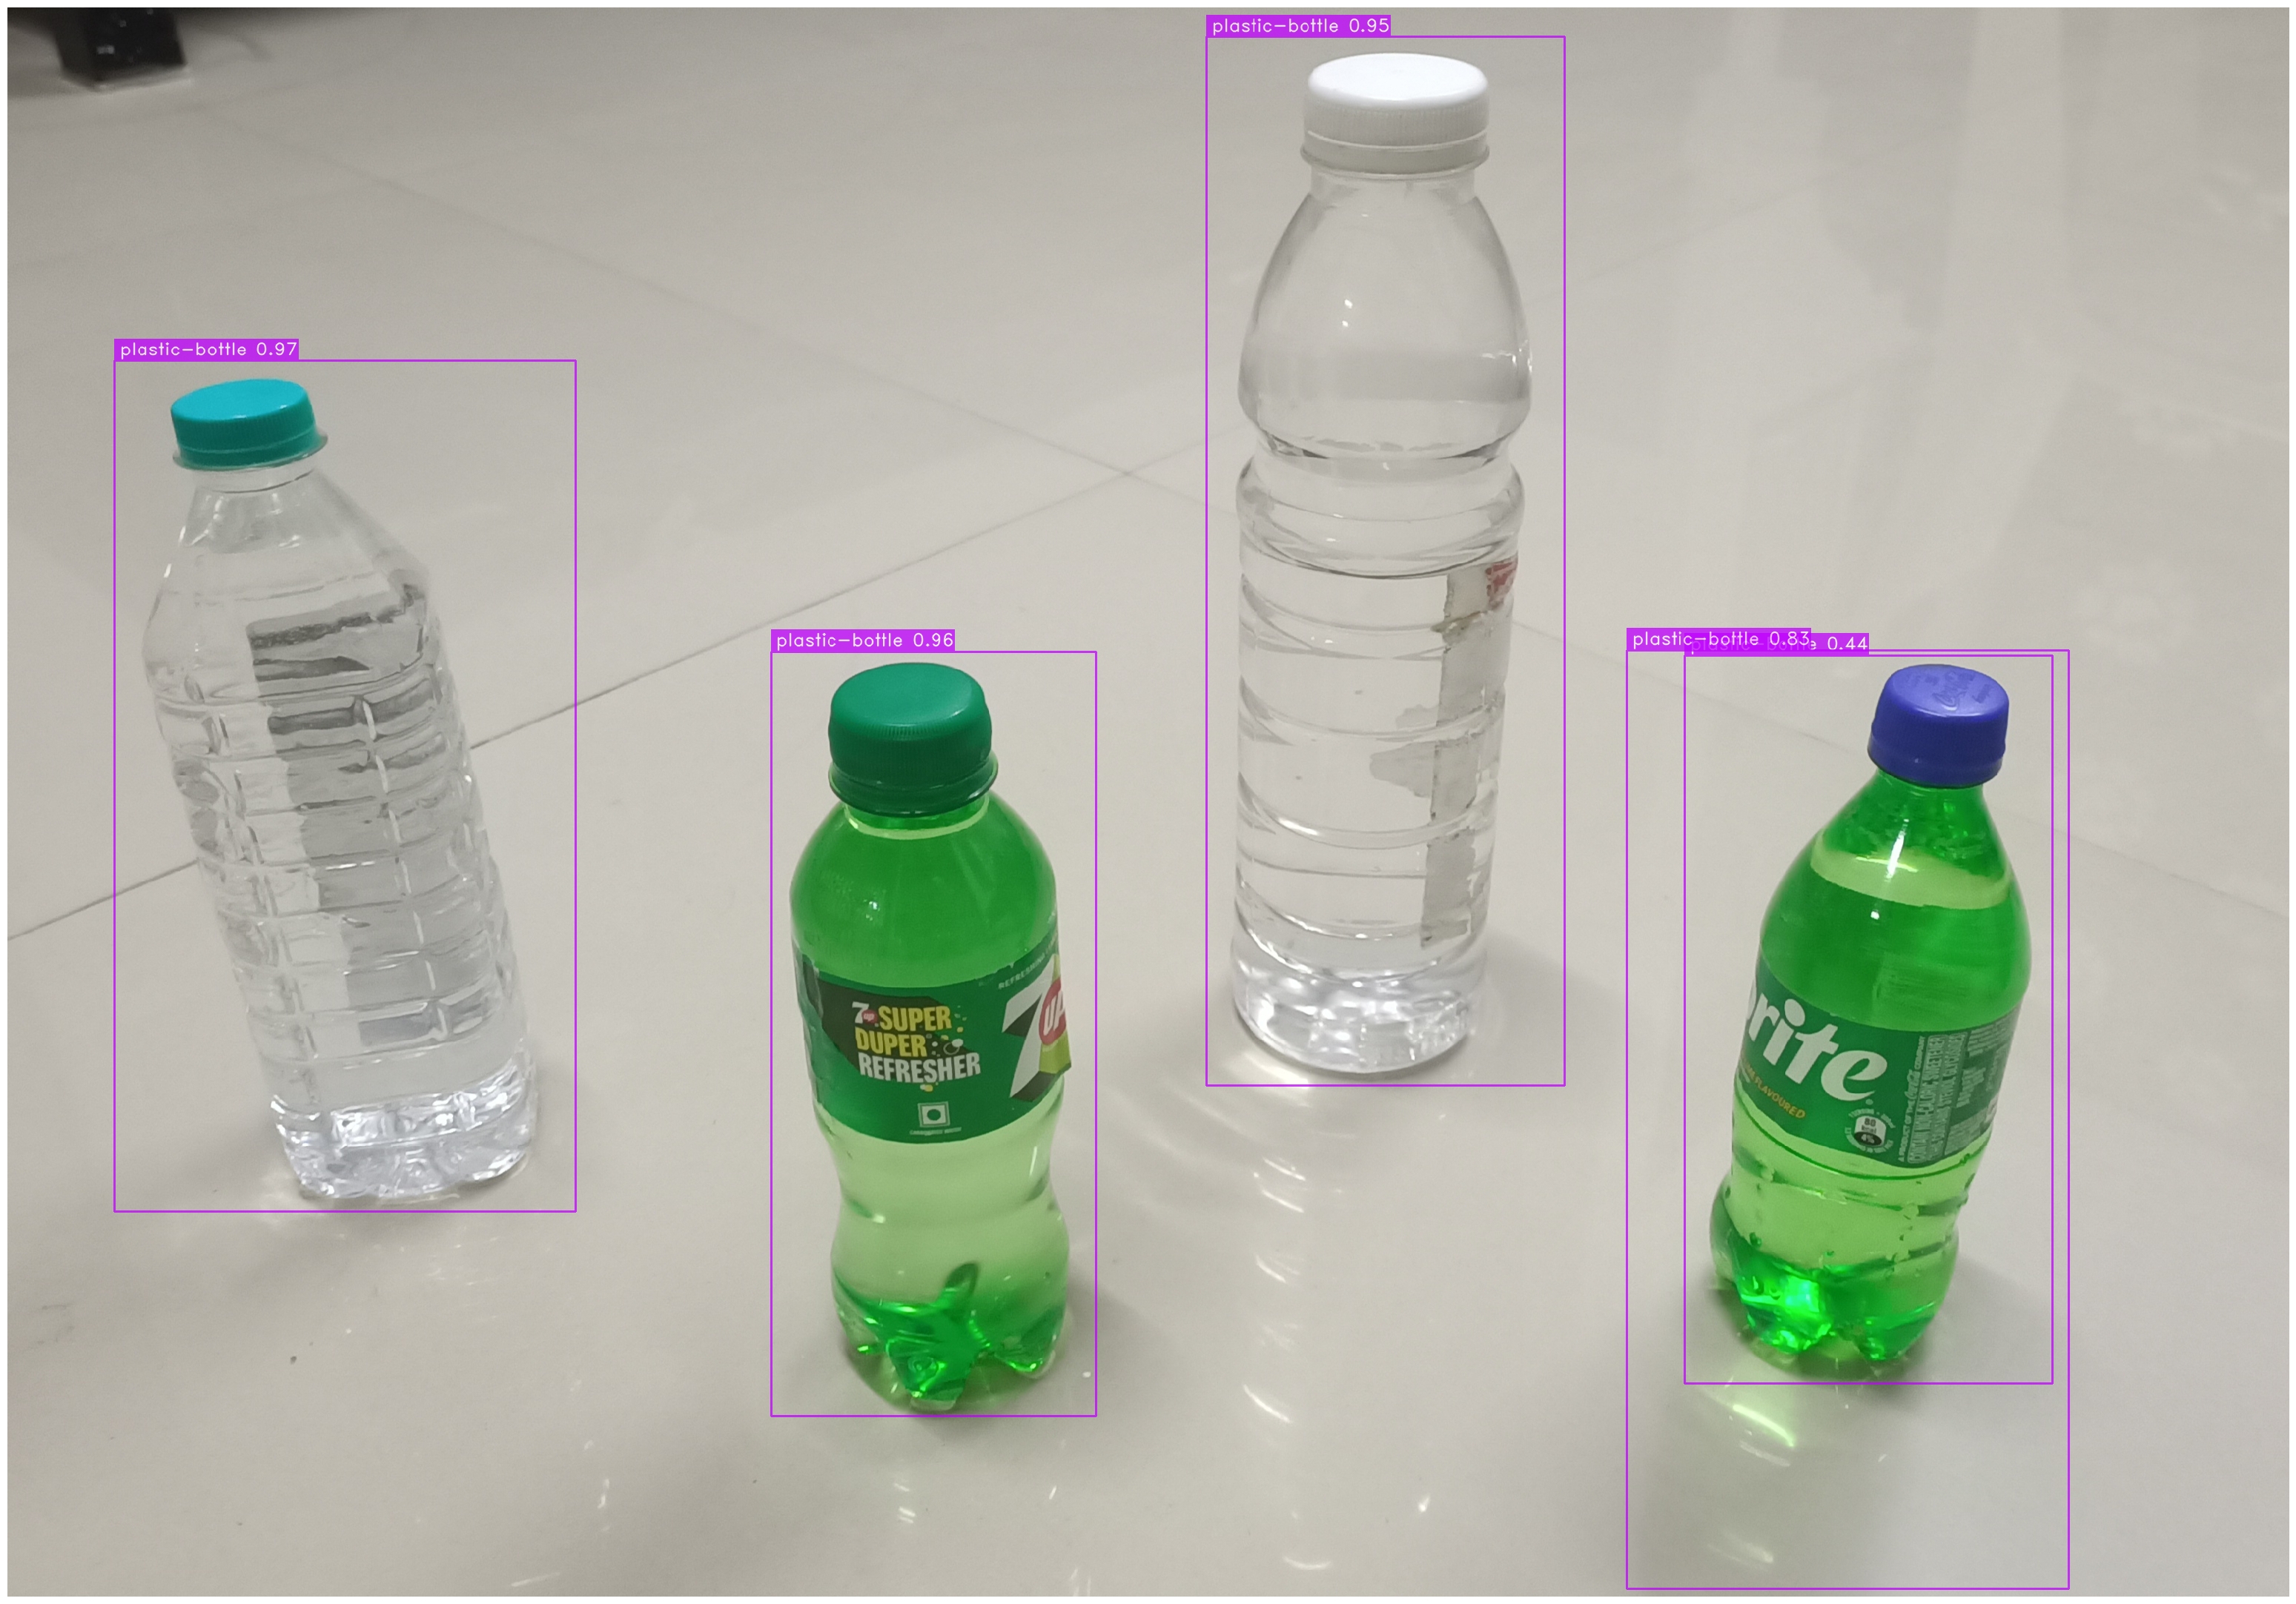

In [7]:
model.to(device).predict(img, conf=0.25).show()

## Test-2

In [11]:
# testing on recoeded video

input_vid = "water_bottle.mp4"
output_vid = "output_water_bottle(1).mp4"

model.to(device).predict(input_vid).save(output_vid)

Predicting Video: 100%|██████████████████████████████████████████████████████████████| 211/211 [01:29<00:00,  2.36it/s]


## Test-3

In [8]:
# final test on Web-Cam

model.to(device).predict_webcam()